# Test 1 Basic Exploration & Insights

## Requiremnts
1- ✅ How many total orders are in the dataset?

2- 📍 What is the average Total Cost of all orders?

3- 🧮 How many orders were made in each country?

4- 💰 Which item has the highest average Unit Price?

5- 📆 How many orders were made on each day of the week?

## Extra Bonus
* 🔍 Find the top 3 salespersons with the highest total sales (Total Cost).

* 📈 Create a simple bar chart of Total Cost by Category.

In [1]:
import pandas as pd
pd.__version__

'2.2.3'

In [10]:
df = pd.read_csv(
    "./data//Orders.csv",
    parse_dates=["Order Date"],
    date_format="%d/%m/%Y",
    index_col=0,
    dtype={
        "Quantity": 'int8',
        "Unit Price": 'int16',
        'Discount': 'float32',
        "Total Cost": 'float32'
    }
)
df.drop(columns=['Lat','Lng'], inplace=True)
df.head()

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True


### Solution 1
How many total orders are in the dataset?

In [3]:
df.shape[0]

20000

### Solution 2
What is the average Total Cost of all orders?

In [3]:
df['Total Cost'].mean()

np.float32(565.30804)

### Solution 3
How many orders were made in each country?

In [5]:
df['Country'].value_counts()

Country
Saudi Arabia            6077
USA                     4226
United Arab Emirates    2858
Syria                   2631
Egypt                   2476
France                  1125
Morocco                  607
Name: count, dtype: int64

### Solution 4
Which item has the highest average Unit Price?

In [6]:
mean_df = df.groupby('Item')["Unit Price"].mean()
mean_df.loc[mean_df == mean_df.max()]

Item
Canon EOS R5    3999.0
Name: Unit Price, dtype: float64

### Solution 5
How many orders were made on each day of the week?

In [7]:
df['Day'].value_counts()

Day
Tue    9248
Mon    6159
Wed    3052
Fri     614
Sun     316
Thu     307
Sat     304
Name: count, dtype: int64

### Extra Bonus
1- find the top 3 salespersons with the highest total sales (Total Cost).

In [8]:
df.groupby('SalesPerson ID')['Total Cost'].sum().sort_values(ascending=False)[:3]

SalesPerson ID
R236    121064.820312
B938    104158.453125
P617    102448.703125
Name: Total Cost, dtype: float32

2- Create a simple bar chart of Total Cost by Category.

<Axes: title={'center': 'Total Cost By Category'}, xlabel='Category', ylabel='Total Cost (Millions)'>

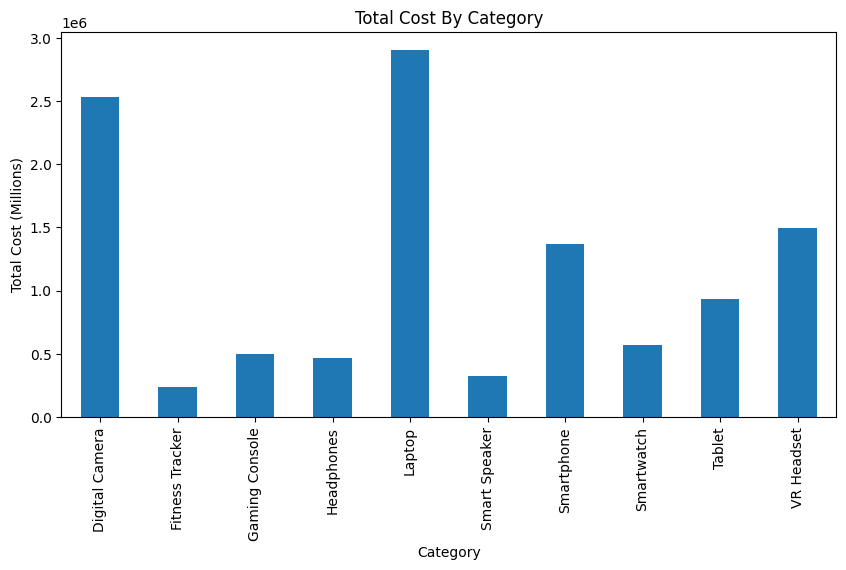

In [9]:
df.groupby('Category')['Total Cost'].sum().plot(kind='bar', x="Category", y="Total Cost", ylabel="Total Cost (Millions)", title="Total Cost By Category", figsize=(10, 5))

# Test 2 Deeper Insights & Trends

## Requirements
1- 📅 Monthly Sales Trend

* Create a new column Month from the Order Date.

* Group by month and calculate total sales (Total Cost) per month.

* Plot it as a line chart showing how sales trend over time.

2- 🛍️ Best-Selling Subcategory

* Find the top 5 subcategories by total quantity sold.

* Visualize it using a horizontal bar chart.

3- 💸 Discount Impact

* Calculate the correlation between Discount and Total Cost.

* What does this tell you? Is it positive, negative, or no correlation?

4- 📦 Average Order Value per Country

* Group by Country and calculate:

    1. Total Sales

    2. Number of Orders

    3. Average Order Value (Total Sales / Order Count)

    4. Sort by average order value and show the top 5 countries.

🧠 Bonus: Advanced
* Create a heatmap (e.g., using seaborn) of correlation between all numerical features in the dataset.


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(
    "./data//Orders.csv",
    parse_dates=["Order Date"],
    date_format="%d/%m/%Y",
    index_col=0,
    dtype={
        "Quantity": 'int8',
        "Unit Price": 'int16',
        'Discount': 'float32',
        "Total Cost": 'float32'
    }
)
df.drop(columns=['Lat','Lng'], inplace=True)
df

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


## 1- 📅 Monthly Sales Trend

* Create a new column `Month` from the Order Date.

In [12]:
df.insert(1, "Month", df['Order Date'].dt.month_name().str[:3])
df

,Order Date,Month,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,
1,2023-01-01,Jan,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Jan,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Jan,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Sep,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Sep,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Sep,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


* Group by `Month` and calculate total sales (Total Cost) per month

In [13]:
total_sales_per_month = df.groupby("Month")['Total Cost'].sum()
total_sales_per_month

Month
Apr    1.483889e+06
Aug    1.411441e+06
Feb    1.318491e+06
Jan    1.406794e+06
Jul    1.327084e+06
Jun    1.333223e+06
Mar    1.447762e+06
May    1.514368e+06
Sep    6.310935e+04
Name: Total Cost, dtype: float32

* Plot it as a line chart showing how sales trend over time.

<Axes: title={'center': 'Total Cost Per Month'}, xlabel='Month', ylabel='Total Cost (Millions)'>

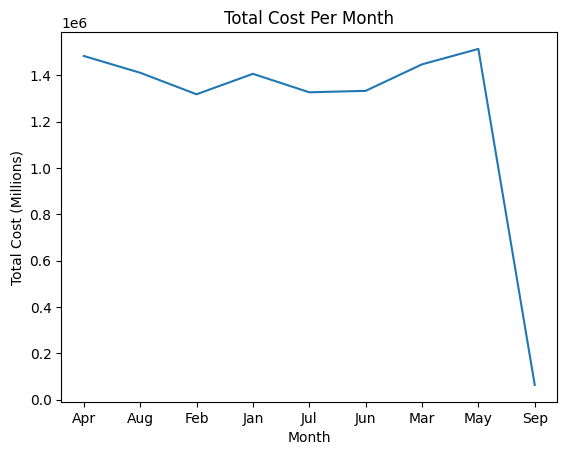

In [14]:
total_sales_per_month.plot(ylabel="Total Cost (Millions)", title="Total Cost Per Month")

## 2- 🛍️ Best-Selling Subcategory

In [15]:
df.head()

,Order Date,Month,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,
1,2023-01-01,Jan,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Jan,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Jan,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True


* Find the top 5 subcategories by total quantity sold.

In [16]:
top_5_sales = df.groupby("Sub Category")['Quantity'].sum().sort_values(ascending=False)[:5]
top_5_sales

Sub Category
Sony PlayStation     3892
Samsung Galaxy       3187
Microsoft Xbox       2239
Microsoft Surface    2014
Lenovo Tab           1925
Name: Quantity, dtype: int64

* Visualize it using a horizontal bar chart.

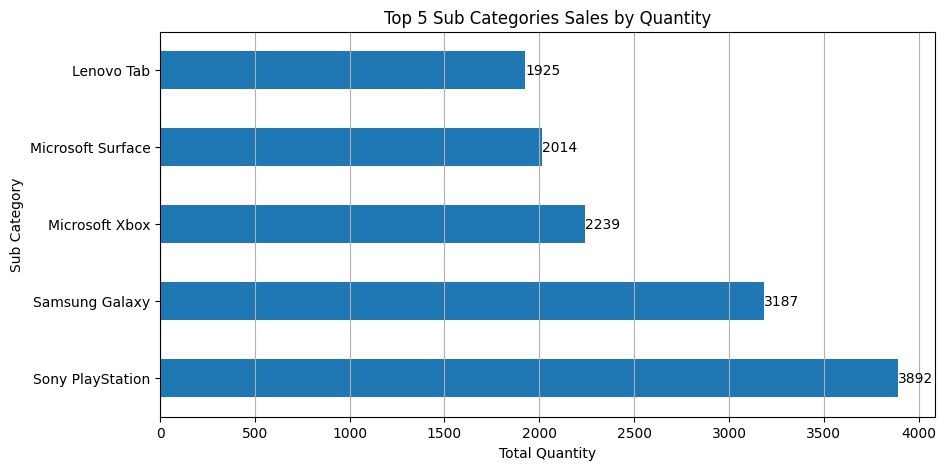

In [17]:
plt_obj = top_5_sales.plot(kind='barh', xlabel="Total Quantity", title="Top 5 Sub Categories Sales by Quantity", figsize=(10, 5))
plt_obj.grid(axis='x')
for index, v in enumerate(top_5_sales):
    plt_obj.text(v, index, v, ha="left", va="center")


## 3- 💸 Discount Impact

* Calculate the correlation between Discount and Total Cost.

In [18]:
df[['Discount', 'Total Cost']].corr()

,Discount,Total Cost
Discount,1.000000,0.688033
Total Cost,0.688033,1.000000


In [19]:
df['Discount'].corr(df['Total Cost'])


np.float64(0.6880328187913879)

* What does this tell you? Is it positive, negative, or no correlation?
`Positive`

## 4- 📦 Average Order Value per Country

* Group by Country and calculate:

In [20]:
group_by_country = df.groupby('Country')
df.head()

,Order Date,Month,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,
1,2023-01-01,Jan,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Jan,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Jan,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Jan,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True


1. Total Sales

In [21]:
total_sales = group_by_country["Total Cost"].sum()
total_sales

Country
Egypt                   1.419206e+06
France                  6.568506e+05
Morocco                 3.455964e+05
Saudi Arabia            3.463404e+06
Syria                   1.348180e+06
USA                     2.446424e+06
United Arab Emirates    1.626501e+06
Name: Total Cost, dtype: float32

2. Number of Orders

In [22]:
orders_count = group_by_country.size()
orders_count

Country
Egypt                   2476
France                  1125
Morocco                  607
Saudi Arabia            6077
Syria                   2631
USA                     4226
United Arab Emirates    2858
dtype: int64

3. Average Order Value (Total Sales / Order Count)

In [23]:
avg_order_value = total_sales / orders_count
avg_order_value

Country
Egypt                   573.185077
France                  583.867222
Morocco                 569.351575
Saudi Arabia            569.920109
Syria                   512.421085
USA                     578.898131
United Arab Emirates    569.104487
dtype: float64

4. Sort by average order value and show the top 5 countries.

In [24]:
avg_order_value.sort_values(ascending=False)[:5]

Country
France          583.867222
USA             578.898131
Egypt           573.185077
Saudi Arabia    569.920109
Morocco         569.351575
dtype: float64

## 5- Create a heatmap (e.g., using seaborn) of correlation between all numerical features in the dataset.

            Quantity  Unit Price  Discount  Total Cost
Quantity    1.000000   -0.003091  0.008018    0.018249
Unit Price -0.003091    1.000000  0.436812    0.431896
Discount    0.008018    0.436812  1.000000    0.688033
Total Cost  0.018249    0.431896  0.688033    1.000000


<Axes: >

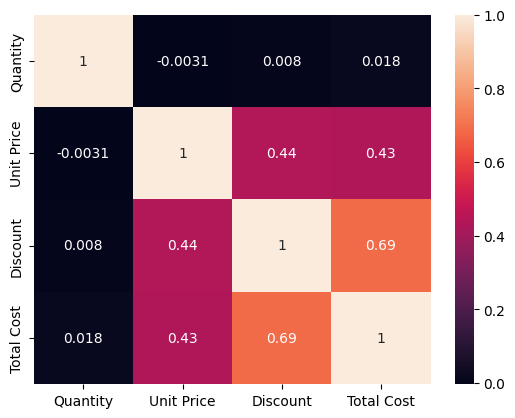

In [25]:
import seaborn as sns

cr = df[['Quantity' , 'Unit Price', 'Discount','Total Cost']].corr()
print(cr)
sns.heatmap(cr, annot=True)

# Test 3 Product Sales & Customer Behavior Analysis

## Requirements
🟢 Part 1: Category Analysis

* Calculate total sales (Total Cost) for each Category and Sub Category.

* Find the top 3 Sub Categories based on:

* Total sales.

* Average discount.

* Visualize the results using bar charts.

🟢 Part 2: Customer Behavior (SalesPerson ID)

* Count how many orders each SalesPerson handled.

* Calculate the average order value for each SalesPerson.

* Filter only those who handled more than 50 orders.
 
* Sort them by average order value, descending.
 
* Visualize the results with a scatter plot (x: number of orders, y: avg order value).
 
🟢 Part 3: Seasonal Sales Analysis

* Add a new column called Season based on the Order Date month:

* Dec, Jan, Feb → Winter

* Mar, Apr, May → Spring

* Jun, Jul, Aug → Summer
 
* Sep, Oct, Nov → Fall
 
* Calculate total sales per season.
 
* Visualize the results using a pie chart.

⭐ Bonus (optional for pros 😉)

* Calculate the average discount per season and show it in a barplot or lineplot.

### 🟢 Part 1: Category Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(
    "./data//Orders.csv",
    parse_dates=["Order Date"],
    date_format="%d/%m/%Y",
    index_col=0,
    dtype={
        "Quantity": 'int8',
        "Unit Price": 'int16',
        'Discount': 'float32',
        "Total Cost": 'float32'
    }
)
df.drop(columns=['Lat','Lng'], inplace=True)
df

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


* Calculate total sales (Total Cost) for each Category and Sub Category.

In [28]:
group_by_cat_sub = df.groupby(['Category', 'Sub Category'])

Find the top 3 Sub Categories based on:
* Total sales 
* Visualize the results using bar charts.

Category        Sub Category      
Laptop          ASUS ROG              758735.81250
Digital Camera  Panasonic Lumix       509247.31250
                Canon EOS R Series    451863.15625
Name: Total Cost, dtype: float32

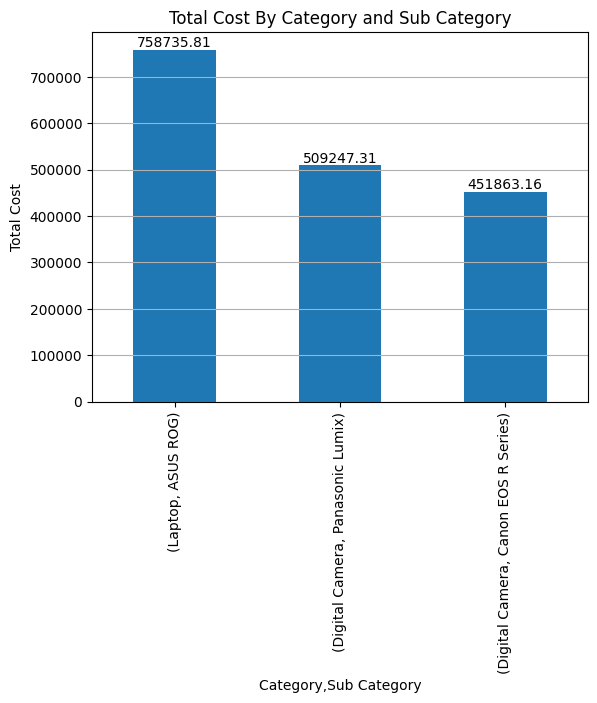

In [29]:
total_sales_by_cat_sub = group_by_cat_sub['Total Cost'].sum().sort_values(ascending=False)[:3]
pl = total_sales_by_cat_sub.plot(kind='bar', ylabel="Total Cost", title="Total Cost By Category and Sub Category")
pl.grid(axis='y')

for index, v in enumerate(total_sales_by_cat_sub):
    pl.text(index, v, f"{v:.2f}", ha="center", va="bottom")

total_sales_by_cat_sub

* Average discount.
* Visualize the results using bar charts.

Category        Sub Category      
Digital Camera  Canon EOS R Series    2299.103027
Laptop          Apple MacBook         1849.843384
                ASUS ROG              1752.339844
Name: Discount, dtype: float32

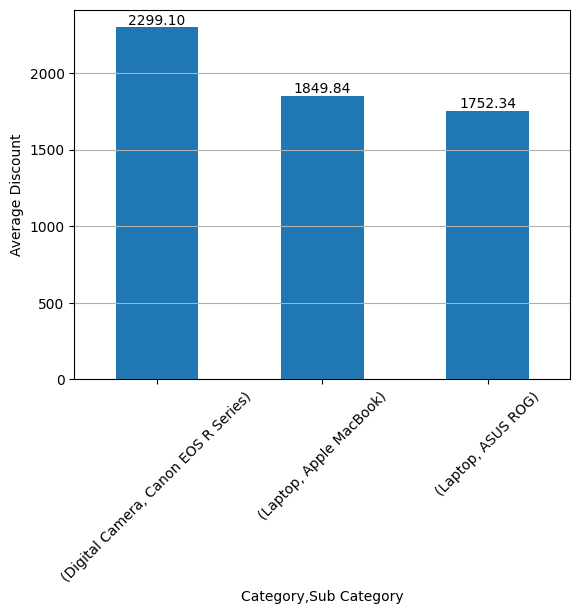

In [30]:
avg_discount_by_cat_sub = group_by_cat_sub['Discount'].mean().sort_values(ascending=False)[:3]
avg_pl= avg_discount_by_cat_sub.plot(rot=45, kind='bar', ylabel="Average Discount")
avg_pl.grid(axis='y')

for index, v in enumerate(avg_discount_by_cat_sub):
    avg_pl.text(index, v, f"{v:.2f}", ha="center", va="bottom")
    
avg_discount_by_cat_sub

### 🟢 Part 2: Customer Behavior (SalesPerson ID)

* Count how many orders each SalesPerson handled.
* Visualize the results with a scatter plot (x: number of orders, y: avg order value).

SalesPerson ID
A058    15
A259    45
A261     7
A280    52
A306    32
        ..
Z856     7
Z901    40
Z924    42
Z948    54
Z995    18
Length: 562, dtype: int16

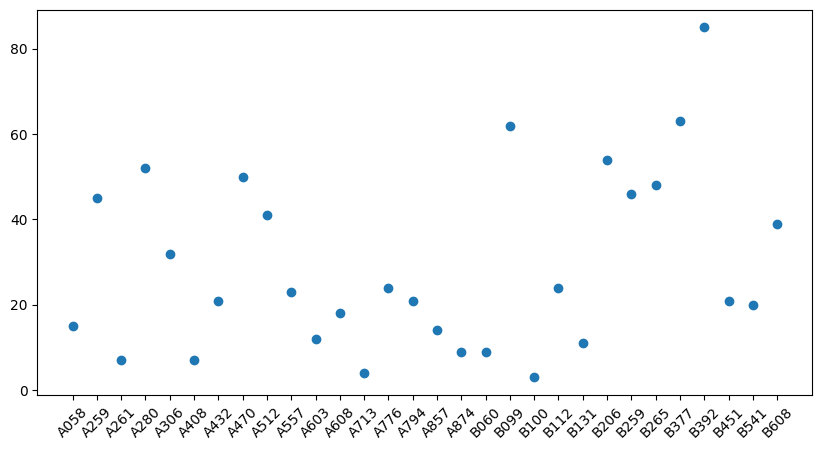

In [31]:
salesperson_group = df.groupby('SalesPerson ID')

orders_count = salesperson_group.size().astype('int16')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
plt.scatter(orders_count.index[:30], orders_count[:30])
        
orders_count

* Calculate the average order value for each SalesPerson.
* Visualize the results with a scatter plot (x: number of orders, y: avg order value).

In [32]:
salesperson_group["Total Cost"].mean()

SalesPerson ID
A058    842.376709
A259    688.941772
A261    282.761658
A280    364.149414
A306    536.963928
           ...    
Z856    378.716278
Z901    440.413025
Z924    460.948425
Z948    559.786194
Z995    329.811157
Name: Total Cost, Length: 562, dtype: float32

* Filter only those who handled more than 50 orders.
* Visualize the results with a scatter plot (x: number of orders, y: avg order value).

In [33]:
count = salesperson_group['SalesPerson ID'].size()
more_than_50 = count[count > 50]
more_than_50

SalesPerson ID
A280    52
B099    62
B206    54
B377    63
B392    85
        ..
Z409    73
Z612    97
Z764    61
Z817    66
Z948    54
Name: SalesPerson ID, Length: 145, dtype: int64

* Sort them by average order value, descending.
* Visualize the results with a scatter plot (x: number of orders, y: avg order value).

In [34]:
more_than_50.sort_values(ascending=False)

SalesPerson ID
L106    213
S855    164
R236    155
Y590    153
C787    152
       ... 
N664     51
G557     51
N498     51
N849     51
K006     51
Name: SalesPerson ID, Length: 145, dtype: int64

### 🟢 Part 3: Seasonal Sales Analysis

In [35]:
df

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


* Add a new column called Season based on the Order Date month:
    * Dec, Jan, Feb → Winter
    * Mar, Apr, May → Spring
    * Jun, Jul, Aug → Summer 
    * Sep, Oct, Nov → Fall


In [36]:
seasons = {
    "Dec": "Winter",
    "Jan": "Winter",
    "Feb": "Winter",
    "Mar": "Spring",
    "Apr": "Spring",
    "May": "Spring",
    "Jun": "Summer",
    "Jul": "Summer",
    "Aug": "Summer",
    "Sep": "Fall",
    "Oct": "Fall",
    "Nov": "Fall",
}

df.insert(2, "Season", df['Order Date'].dt.month_name().str[:3].map(seasons))
df

,Order Date,Day,Season,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,
1,2023-01-01,Mon,Winter,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Winter,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Winter,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,Winter,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,Winter,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Fall,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Fall,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,Fall,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


* Calculate total sales per season.

In [37]:
total_sales_per_season = df.groupby("Season")['Total Cost'].sum()
total_sales_per_season

Season
Fall      6.310935e+04
Spring    4.446020e+06
Summer    4.071748e+06
Winter    2.725284e+06
Name: Total Cost, dtype: float32

* Visualize the results using a pie chart.

Season
Fall      6.310935e+04
Spring    4.446020e+06
Summer    4.071748e+06
Winter    2.725284e+06
Name: Total Cost, dtype: float32

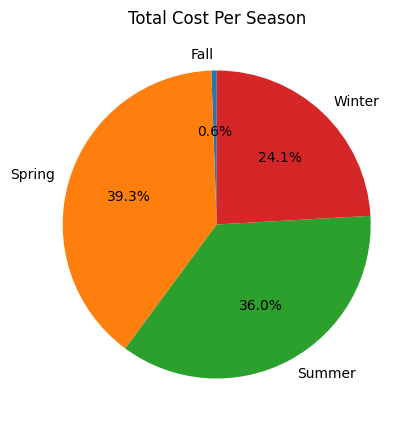

In [38]:
total_sales_per_season.plot(kind='pie', startangle=90, ylabel="", title="Total Cost Per Season", figsize=(10, 5), autopct='%1.1f%%')
total_sales_per_season

### ⭐ Bonus (optional for pros 😉)

* Calculate the average discount per season and show it in a barplot or lineplot.

In [39]:
df

,Order Date,Day,Season,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,,
1,2023-01-01,Mon,Winter,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Winter,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Winter,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,Winter,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,Winter,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Fall,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Fall,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,Fall,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


Season
Fall      815.460632
Spring    575.028870
Summer    560.451111
Winter    556.653076
Name: Discount, dtype: float32

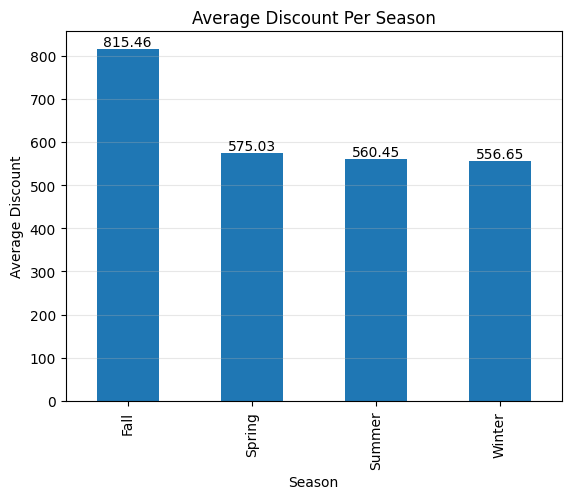

In [40]:
avg_season = df.groupby("Season")['Discount'].mean()
avg_season_plt = avg_season.plot(kind='bar', ylabel="Average Discount", title="Average Discount Per Season")
avg_season_plt.grid(axis='y', alpha=.3)

for index, v in enumerate(avg_season):
    avg_season_plt.text(index, v, f"{v:.2f}", ha="center", va="bottom")
    
avg_season


In [46]:
df.describe()

,Order Date,Quantity,Unit Price,Discount,Total Cost
count,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2023-05-01 21:42:24.480000,4.261050,609.292000,566.050598,565.308044
min,2023-01-01 00:00:00,1.000000,29.000000,0.366600,0.275500
25%,2023-03-01 00:00:00,3.000000,179.000000,72.720778,73.930124
50%,2023-05-02 00:00:00,4.000000,399.000000,202.534500,205.000504
75%,2023-07-02 00:00:00,5.000000,899.000000,552.775513,558.260544
max,2023-09-01 00:00:00,8.000000,3999.000000,37877.375000,37990.742188
std,NaN,1.425028,617.976051,1292.119629,1294.221924


# Test 4

Q1: Average order value

Q2: Highest-revenue category

Q3: Return rate

In [120]:
import pandas as pd
df = pd.read_csv(
    "./data/e_commerce.csv",
    parse_dates=["order_date"],
    dtype={
        "discount_pct": 'float32',
        "quantity": "int8",
        "shipping_days": "int8",
    },
    true_values=["Yes"],
    false_values=["No"],
    index_col=0
)
df.head()

,customer_id,order_date,product_category,product_name,quantity,unit_price,discount_pct,payment_method,country,city,shipping_days,customer_segment,return_status
order_id,,,,,,,,,,,,,
1001,CU-201,2020-01-15,Electronics,Wireless Headphones,1,89.99,0.05,Credit Card,USA,New York,3,Premium,False
1002,CU-156,2020-01-16,Clothing,Men's Jeans,2,45.50,0.15,PayPal,UK,London,5,Standard,True
1003,CU-342,2020-01-18,Home & Kitchen,Blender,1,32.75,0.00,Debit Card,Canada,Toronto,7,Standard,False
1004,CU-201,2020-02-02,Electronics,Smartphone,1,699.00,0.10,Credit Card,USA,New York,2,Premium,False
1005,CU-499,2020-02-05,Books,Python Programming,3,24.99,0.20,PayPal,Australia,Sydney,10,Budget,False


## Q1: Average order value

In [121]:
values = (df['quantity'] * df["unit_price"])
after_discount = (values * (1 - df['discount_pct']))
df.insert(7, 'final_price', after_discount)
df.head()
after_discount.mean()

np.float64(154.34577929905652)

## Q2: Highest-revenue category

In [125]:
df.groupby("product_category")['final_price'].sum().nlargest(1)

product_category
Electronics    5442.539467
Name: final_price, dtype: float64

## Q3: Return rate

In [123]:
orders_count = df.shape[0]
returned_orders = df[df['return_status'] == True].shape[0]
(returned_orders / orders_count) * 100

14.000000000000002